In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
    

In [2]:
# dataset paths

DATASET_PATH_DEF = "/home/massi/Dataset/archive/casting_512x512/casting_512x512/def_front"
DATASET_PATH_OK = "/home/massi/Dataset/archive/casting_512x512/casting_512x512/ok_front"


In [3]:
def load_all_images(path):
    """
    load all images in the given path
    into a tuple and return
    """

    image_paths = [os.path.join(path, f) for f in os.listdir(path)]
    img_num = len(image_paths)
    print(f"num of images: {img_num}")

    if img_num:
        print(image_paths[0])
        img_1 = cv2.imread(image_paths[0])

        images = np.zeros((img_num, img_1.shape[0], img_1.shape[1], img_1.shape[2]), dtype="uint8")
        images[0, :, :, :] = img_1

        for i in range(1, img_num):
            img = cv2.imread(image_paths[i])
            #print(f' opencv img shape: {img.shape}')
            images[i, :, :, :] = img
    else:
        print("no images found")

    return images

In [4]:
images = load_all_images(DATASET_PATH_DEF)
rgb_mean = np.mean(images, axis=(0, 1, 2))

r_mean = np.mean(images[:, :, :, 0])
g_mean = np.mean(images[:, :, :, 1])
b_mean = np.mean(images[:, :, :, 2])

#cv2.imshow("test", images[4, :, :, :])

print(images.shape)
print(f'rgb mean: {rgb_mean}')

print(f'r mean: {r_mean}')
print(f'g mean: {g_mean}')
print(f'b mean: {b_mean}')

for i in range(3):
    print(f'chanel{i}')
    print(images[:, :, :, 0].max())
    print(images[:, :, :, 0].min())
    print(images[:, :, :, 0].mean())
    print(images[:, :, :, 0].std())

num of images: 781
/home/massi/Dataset/archive/casting_512x512/casting_512x512/def_front/cast_def_0_42.jpeg
(781, 512, 512, 3)
rgb mean: [138.55649767 138.55649767 138.55649767]
r mean: 138.55649767398225
g mean: 138.55649767398225
b mean: 138.55649767398225
chanel0
255
0
138.55649767398225
60.645298429705164
chanel1
255
0
138.55649767398225
60.645298429705164
chanel2
255
0
138.55649767398225
60.645298429705164


<Figure size 432x288 with 0 Axes>

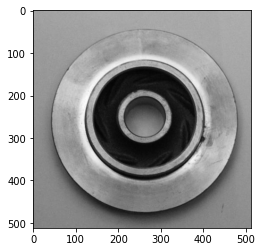

In [7]:
plt.figure()
f, window = plt.subplots(1,1,figsize=(10,4)) 
window.imshow(images[56, :, :, :])

In [6]:
img_test = np.zeros((100, 100, 3), dtype='uint8')

img_test[:, :, 0] = 255
img_test[:, :, 1] = 120
img_test[:, :, 2] = 0

rgb_mean = np.mean(img_test, axis=(0, 1))
print(f'rgb mean: {rgb_mean}')

rgb mean: [255. 120.   0.]
